# My first validated integration: $\dot{x}=x^2$

Here, we will integrate the ODE $\dot{x}=x^2$, using `ValidatedNumerics.jl`:

In [1]:
#this is not commutative: if I try:
#    using ValidatedNumerics, TaylorIntegration
#then the integration crashes

using TaylorIntegration, ValidatedNumerics

#for plotting:
using Plots
pyplot()

Plots.PyPlotBackend()

The initial conditions, and some integration parameters:

In [2]:
#note that we have mixed types: Interval{Float64}, Int64, Float64...
x0 = @interval 3; t0 = 0; tmax = @interval 0.333333; abstol = 1e-10
x0, t0, tmax, abstol

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in bytestring(::Ptr{

([3, 3],0,[0.333332, 0.333334],1.0e-10)

The maximum time, `tmax`, is rigorously below the singularity:

In [3]:
tmax < 1/3

UInt8}) at ./deprecated.jl:50
 in round_string(::BigFloat, ::Int64, ::RoundingMode{:Down}) at /Users/Jorge/.julia/v0.5/ValidatedNumerics/src/display.jl:61
 in representation(::ValidatedNumerics.Interval{Float64}, ::Void) at /Users/Jorge/.julia/v0.5/ValidatedNumerics/src/display.jl:82
 in show(::IOContext{Base.AbstractIOBuffer{Array{UInt8,1}}}, ::ValidatedNumerics.Interval{Float64}) at /Users/Jorge/.julia/v0.5/ValidatedNumerics/src/display.jl:179
 in show_delim_array(::IOContext{Base.AbstractIOBuffer{Array{UInt8,1}}}, ::Tuple{ValidatedNumerics.Interval{Float64},Int64,ValidatedNumerics.Interval{Float64},Float64}, ::Char, ::Char, ::Char, ::Bool, ::Int64, ::Int64) at ./show.jl:355
 in limitstringmime(::MIME{Symbol("text/plain")}, ::Tuple{ValidatedNumerics.Interval{Float64},Int64,ValidatedNumerics.Interval{Float64},Float64}) at /Users/Jorge/.julia/v0.5/IJulia/src/execute_request.jl:31
 in display_dict(::Tuple{ValidatedNumerics.Interval{Float64},Int64,ValidatedNumerics.Interval{Float64},Floa

true

The ODE we're trying to integrate:

In [4]:
f(t, x) = x.^2

f (generic function with 1 method)

Perform a validated Taylor integration:

In [5]:
@time tT, xT = taylorinteg(f, x0, t0, tmax, 25, abstol, maxsteps=500);

  1.661948 seconds (2.10 M allocations: 78.587 MB, 2.84% gc time)


How many steps did the integrator take?

In [6]:
length(tT), length(xT)

(45,45)

Is the last step rigorously below $1/3$?

In [7]:
tT[end]<1/3

true

YES!

Now, we will compare our numerical solution, to the analytical solution:

In [8]:
 exactsol(t, x0) = x0./(1.0-x0.*t)

exactsol (generic function with 1 method)

At the end of the integration, we are enclosing the analytical solution, although perhaps the error is relatively high:

In [9]:
exactsol(tT[end], xT[1])-xT[end]

[-41.8023, 69.9602]

We are now interested in plotting our validated solution:

In [10]:
tT_hi = map(x->x.hi, tT)
tT_lo = map(x->x.lo, tT)
xT_hi = map(x->x.hi, xT)
xT_lo = map(x->x.lo, xT);

In [11]:
ts = [log10(tT_lo[2:end]), log10(tT_hi[2:end])]
ys = [log10(xT_lo[2:end]), log10(xT_hi[2:end])]

2-element Array{Array{Float64,1},1}:
 [0.675016,0.868221,1.05698,1.24152,1.42204,1.59873,1.77178,1.94133,2.10756,2.27059  …  5.5893,5.69949,5.80837,5.91597,6.02231,6.12743,6.23136,6.33412,6.43575,6.47711]
 [0.675016,0.868221,1.05698,1.24152,1.42204,1.59873,1.77178,1.94133,2.10756,2.27059  …  5.5893,5.69949,5.80837,5.91597,6.02231,6.12743,6.23136,6.33413,6.43576,6.47713]

Plot $x_\mathrm{lo}$ vs $t_\mathrm{lo}$ and $x_\mathrm{hi}$ vs $t_\mathrm{hi}$


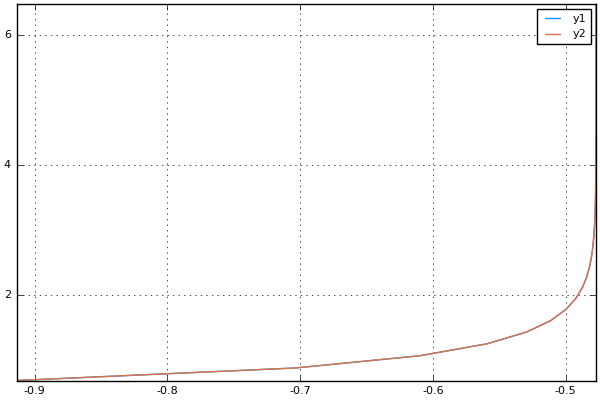

In [12]:
plot(ts, ys)

## A multi-dimensional validated Taylor integration:

Here, we will integrate once again the ODE $\dot{x}=x^2$, but using an array of intervals as the initial condition. Our aim is to use the `taylorinteg` method which corresponds to multi-dimensional ODEs:

In [13]:
q0 = @interval 3 # the initial condition as a interval
x0_ = [q0, q0] # the initial condition as an array of intervals
t0_ = 0 # the initial time
tmax_ = 0.333333 # the final time
abstol_ = 1e-20 # the absolute (local) tolerance
order_ = 25 # the order of the Taylor expansion

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


25

The ODE is the same:

In [14]:
@time tT, xT = taylorinteg(f, x0_, t0_, tmax_, order_, abstol_, maxsteps=500);

  1.470377 seconds (5.79 M allocations: 183.335 MB, 8.93% gc time)


For each component, is the analytical solution rigorously contained in the numerical solution?

In [15]:
exactsol(tT[end], xT[1,1]) ∈ xT[end,1], exactsol(tT[end], xT[1,2]) ∈ xT[end,2]

(true,true)

YES!!!!!!!

## A multi-dimensional validated integration, with extender precision:

Here, we will test the use of `BigFloats` into `TaylorIntegration.jl`:

In [63]:
q03 = @interval 3 # the initial condition as a interval
x03 = [q03, q03] # the initial condition as an array of intervals
t03 = 0 # the initial time
tmax3 = BigFloat(0.333) # the final time
abstol3 = 1e-60 # the absolute (local) tolerance
order3 = 50 # the order of the Taylor expansion

50

The ODE is the same:

In [64]:
@time tT3, xT3 = taylorinteg(f, x03, t03, tmax3, order3, abstol3, maxsteps=500);

 10.496141 seconds (94.34 M allocations: 3.755 GB, 30.21% gc time)


Is the final time less than $1/3$?

In [65]:
tT3[end] < 1/3

true

YES!!!!!!!

How many steps did the Taylor integrator perform?

In [66]:
length(tT3), length(xT3[:,1]), length(xT3[:,2])

(125,125,125)

For each component, is the analytical solution rigorously contained in our validated solution?

In [67]:
exactsol(tT3[end], xT3[1,1]) ∈ xT3[end,1], exactsol(tT3[end], xT3[1,2]) ∈ xT3[end,2]

(false,false)

NO.

What is the radius of the enclosing intervals?

In [68]:
radius(xT3[end,1]), radius(xT3[end,2])

(3.593423987602661618086353334039054590886042123718958211047942368986343884154616e-67,3.593423987602661618086353334039054590886042123718958211047942368986343884154616e-67)

In [70]:
tT3[end]

[0.333, 0.333001]₂₅₆

In [77]:
xT3[end,1].lo, xT3[end,1].hi

(3.00000000000016386891843468205637400435121483877167101158583132058131476435749e+03,3.000000000000163868918434682056374004351214838771671011585831320581315483042287e+03)

In [76]:
exactsol(tT3[end], xT3[1,1]).lo, exactsol(tT3[end], xT3[1,1]).hi

(3.000000000000163868918434682056374004351214838771671011585859341301596474904172e+03,3.000000000000163868918434682056374004351214838771671011585859341301596474904208e+03)